# Data Structure Overview

## The `my_spectra` Array

The `my_spectra` array contains all the spectra loaded from the file.

### Array Structure
Each element in the array follows this format:
```
[mzs, intensities, coordinates]
```

### Component Descriptions

- **`mzs`**: An array of recorded m/z values for that pixel
- **`intensities`**: An array of recorded intensities corresponding to the m/z values for that pixel  
- **`coordinates`**: A tuple in the form `(x, y, z)` where `z=1` for all pixels

### Key Points
- Each spectrum corresponds to a specific spatial location
- The x,y coordinates allow mapping spectra to their physical positions

In [1]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('../HIV.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

print(f"Total spectra loaded: {len(my_spectra)}")

    

/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:80: UserWarning: Unrecognized accession in <cvParam>:  (name: "").
  warn('Unrecognized accession in <cvParam>: %s (name: "%s").' % (accession, raw_name))
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
/home/vmuser/anaconda3/lib/python3.12/site-packages/pyimzml/ontology/ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(


Total spectra loaded: 56678


In [2]:
import numpy as np
import random

# To show that different pixels have different number of recorded mz values
for spectrum in my_spectra[0::500]:
    print(f'Pixel {spectrum[2][:2]} has recorded mzs',len(spectrum[0]))

Pixel (30, 1) has recorded mzs 69
Pixel (54, 13) has recorded mzs 261
Pixel (24, 21) has recorded mzs 1078
Pixel (40, 27) has recorded mzs 451
Pixel (31, 33) has recorded mzs 1433
Pixel (19, 39) has recorded mzs 708
Pixel (89, 44) has recorded mzs 1483
Pixel (45, 50) has recorded mzs 511
Pixel (58, 55) has recorded mzs 1034
Pixel (56, 60) has recorded mzs 334
Pixel (41, 65) has recorded mzs 881
Pixel (32, 70) has recorded mzs 1243
Pixel (27, 75) has recorded mzs 1215
Pixel (27, 80) has recorded mzs 71
Pixel (33, 85) has recorded mzs 723
Pixel (45, 90) has recorded mzs 238
Pixel (62, 95) has recorded mzs 1175
Pixel (82, 100) has recorded mzs 892
Pixel (106, 105) has recorded mzs 331
Pixel (40, 111) has recorded mzs 488
Pixel (73, 116) has recorded mzs 1469
Pixel (110, 121) has recorded mzs 1359
Pixel (58, 127) has recorded mzs 642
Pixel (95, 132) has recorded mzs 905
Pixel (125, 137) has recorded mzs 1317
Pixel (53, 143) has recorded mzs 461
Pixel (71, 148) has recorded mzs 820
Pixel (8

**1. The above cell show that there are only 2 relevant coordinates (x,y) since z=1 for each spectrum**

**From this we can conclude that each spectrum can be plotted on a cartesian plane**

**2. We can see that we always have the same number of intensities as m/z ratios**

**With this array, we can plot the 2D graph of intensities vs m/z for a single pixel point**



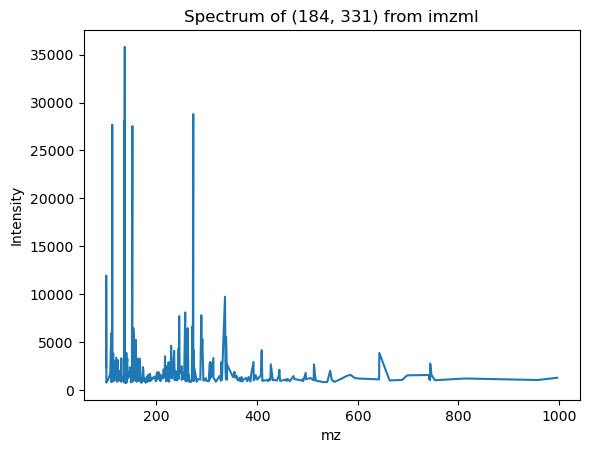

[100.07619  100.0873   100.112495 100.457275 102.128044]
[ 2397.0312  3677.0625 11951.25     780.3828  1056.707 ]


In [3]:
import matplotlib.pyplot as plt

spectrumx = my_spectra[random.randint(0,len(my_spectra)-1)]
# spectrumx = my_spectra[2]
plt.plot(spectrumx[0],spectrumx[1])
title = "Spectrum of " + str(spectrumx[2][:2]) + " from imzml"
plt.title(title)
plt.xlabel("mz")
plt.ylabel("Intensity")
plt.show()

print(spectrumx[0][:5])
print(spectrumx[1][:5])


335 460
Points found 36868


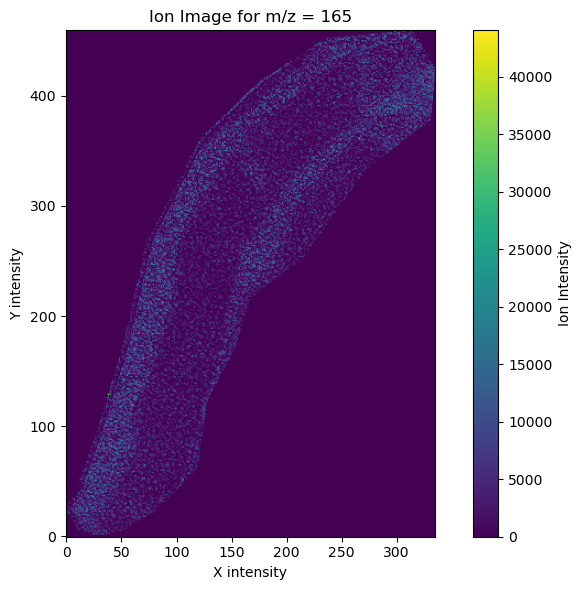

In [5]:

# Choose the m/z you want to plot  and tolerance
target_mz = 165
tolerance = 0.02

# Get image dimensions
all_coords = [coord for _, _, coord in my_spectra]
xs, ys, _ = zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

In [8]:
ion_image[0,0]


0.0